In [119]:
import pandas as pd
import numpy
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [77]:
data= pd.read_csv("problem_2_garfield_activity.csv")

In [3]:
data

,8AM,9AM,10AM,11AM,Noon,1PM,2PM,3PM,4PM,5PM,Commute,DayOfWeek,WatchTV
0,Coffee,6,7,2,Sandwich,10,8,4,Tea,10,Long,Mon,Yes
1,Doughnut,4,5,3,Lenthils,1,1,3,PingPong,7,Short,Tue,No
2,Coffee,7,4,4,Taco,10,4,3,PingPong,7,Short,Wed,No
3,Coffee,1,1,8,Sandwich,10,7,6,PingPong,8,Short,Thu,Yes
4,Doughnut,8,6,7,Sandwich,7,6,8,Tea,8,Long,Fri,Yes
5,Sandwich,10,2,4,Lenthils,1,3,9,Coffee,9,Short,Sat,No
6,Doughnut,6,10,7,Lenthils,1,0,6,Coffee,8,Short,Mon,No
7,Coffee,10,6,10,Taco,5,2,0,Tea,8,Short,Tue,No
8,Sandwich,8,5,9,Lenthils,9,7,5,PingPong,3,Short,Wed,No
9,Coffee,4,7,2,Taco,0,8,2,Workout,10,Short,Thu,Yes


In [78]:
data.dropna(inplace=True)
data

,8AM,9AM,10AM,11AM,Noon,1PM,2PM,3PM,4PM,5PM,Commute,DayOfWeek,WatchTV
0,Coffee,6,7,2,Sandwich,10,8,4,Tea,10,Long,Mon,Yes
1,Doughnut,4,5,3,Lenthils,1,1,3,PingPong,7,Short,Tue,No
2,Coffee,7,4,4,Taco,10,4,3,PingPong,7,Short,Wed,No
3,Coffee,1,1,8,Sandwich,10,7,6,PingPong,8,Short,Thu,Yes
4,Doughnut,8,6,7,Sandwich,7,6,8,Tea,8,Long,Fri,Yes
5,Sandwich,10,2,4,Lenthils,1,3,9,Coffee,9,Short,Sat,No
6,Doughnut,6,10,7,Lenthils,1,0,6,Coffee,8,Short,Mon,No
7,Coffee,10,6,10,Taco,5,2,0,Tea,8,Short,Tue,No
8,Sandwich,8,5,9,Lenthils,9,7,5,PingPong,3,Short,Wed,No
9,Coffee,4,7,2,Taco,0,8,2,Workout,10,Short,Thu,Yes


In [6]:
x=data.iloc[:,:-1]
y=data.iloc[:,[-1]]

In [79]:
x_cat = x.select_dtypes(include=[object])
x_cat

,8AM,Noon,4PM,Commute,DayOfWeek
0,Coffee,Sandwich,Tea,Long,Mon
1,Doughnut,Lenthils,PingPong,Short,Tue
2,Coffee,Taco,PingPong,Short,Wed
3,Coffee,Sandwich,PingPong,Short,Thu
4,Doughnut,Sandwich,Tea,Long,Fri
5,Sandwich,Lenthils,Coffee,Short,Sat
6,Doughnut,Lenthils,Coffee,Short,Mon
7,Coffee,Taco,Tea,Short,Tue
8,Sandwich,Lenthils,PingPong,Short,Wed
9,Coffee,Taco,Workout,Short,Thu


In [80]:
enc=OneHotEncoder(drop='first')
enc.fit(x_cat)
onehotlabels = enc.transform(x_cat).toarray()

In [81]:
names={
    'x0':'8AM',
    'x1':'Noon',
    'x2':'4PM',
    'x3':'Commute',
    'x4':'DayOfWeek'
}

In [82]:
enc.get_feature_names()

array(['x0_Doughnut', 'x0_Sandwich', 'x1_Sandwich', 'x1_Taco',
       'x2_PingPong', 'x2_Tea', 'x2_Workout', 'x3_Short', 'x4_Mon',
       'x4_Sat', 'x4_Thu', 'x4_Tue', 'x4_Wed'], dtype=object)

In [83]:
newdf=pd.DataFrame(onehotlabels,columns=enc.get_feature_names())

In [84]:
newdf

,x0_Doughnut,x0_Sandwich,x1_Sandwich,x1_Taco,x2_PingPong,x2_Tea,x2_Workout,x3_Short,x4_Mon,x4_Sat,x4_Thu,x4_Tue,x4_Wed
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [85]:
for d in names:
    
    newdf.columns=newdf.columns.str.replace(d,names[d])

In [86]:
newdf

,8AM_Doughnut,8AM_Sandwich,Noon_Sandwich,Noon_Taco,4PM_PingPong,4PM_Tea,4PM_Workout,Commute_Short,DayOfWeek_Mon,DayOfWeek_Sat,DayOfWeek_Thu,DayOfWeek_Tue,DayOfWeek_Wed
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [87]:
x_num=data.select_dtypes(exclude=object)

In [88]:

X_train=pd.concat([x_num,newdf], axis=1, sort=False, ignore_index=False)
X_train

,9AM,10AM,11AM,1PM,2PM,3PM,5PM,8AM_Doughnut,8AM_Sandwich,Noon_Sandwich,Noon_Taco,4PM_PingPong,4PM_Tea,4PM_Workout,Commute_Short,DayOfWeek_Mon,DayOfWeek_Sat,DayOfWeek_Thu,DayOfWeek_Tue,DayOfWeek_Wed
0,6,7,2,10,8,4,10,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,4,5,3,1,1,3,7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,7,4,4,10,4,3,7,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1,1,8,10,7,6,8,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,8,6,7,7,6,8,8,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,10,2,4,1,3,9,9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6,6,10,7,1,0,6,8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
7,10,6,10,5,2,0,8,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8,8,5,9,9,7,5,3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9,4,7,2,0,8,2,10,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [89]:
pd.options.display.max_columns=100

In [109]:
y_num=(y=='Yes').astype(int)
y_num

,WatchTV
0,1
1,0
2,0
3,1
4,1
5,0
6,0
7,0
8,0
9,1


In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
rf = RandomForestClassifier(n_estimators = 5, random_state = 42, max_depth=3)

In [112]:
rf.fit(X_train, y.values.ravel());

In [116]:
imp=rf.feature_importances_

In [123]:
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(imp)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], imp[indices[f]]))

Feature ranking:
1. 2PM (0.299401)
2. Noon_Sandwich (0.262640)
3. 5PM (0.140505)
4. 1PM (0.092045)
5. 9AM (0.079365)
6. 8AM_Sandwich (0.040755)
7. DayOfWeek_Mon (0.033929)
8. DayOfWeek_Sat (0.023602)
9. 10AM (0.018357)
10. 8AM_Doughnut (0.009400)
11. Commute_Short (0.000000)
12. 4PM_Workout (0.000000)
13. 4PM_Tea (0.000000)
14. 4PM_PingPong (0.000000)
15. Noon_Taco (0.000000)
16. DayOfWeek_Tue (0.000000)
17. 3PM (0.000000)
18. DayOfWeek_Thu (0.000000)
19. 11AM (0.000000)
20. DayOfWeek_Wed (0.000000)


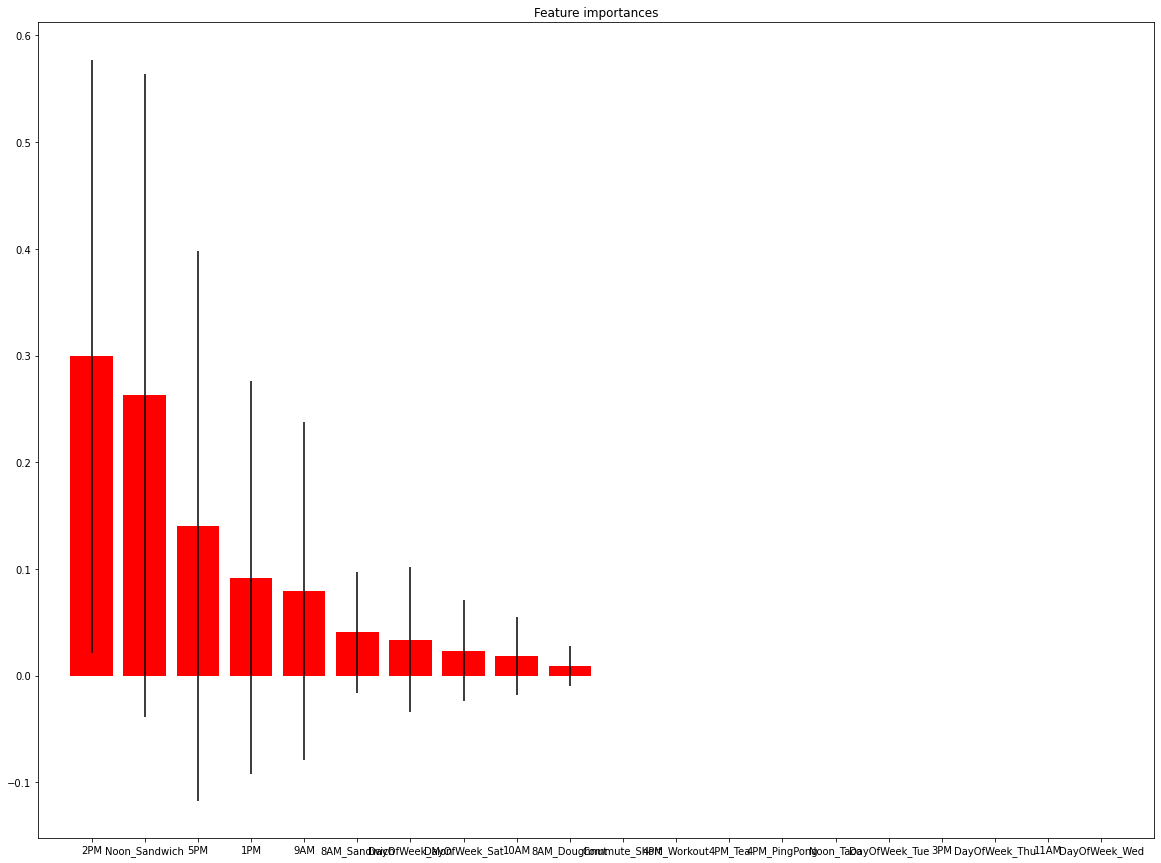

In [133]:
plt.figure(figsize=(20,15))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), imp[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices])
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [134]:
print("Based on Above graph features 2PM, Noon Sandwich and 5PM are leading indicators")

Based on Above graph features 2PM, Noon Sandwich and 5PM are leading indicators
